In [ ]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 8.5 MB/s eta 0:00:00


In [ ]:
!pip install qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=3e45343c52457e018dc591c82788e4f8765038e6ffdc639fef55d9c522006417
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 25.1 MB/s eta 0:00:00


<ipython-input-6-07243b99501d>:34: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  simulator = Aer.get_backend('qasm_simulator')


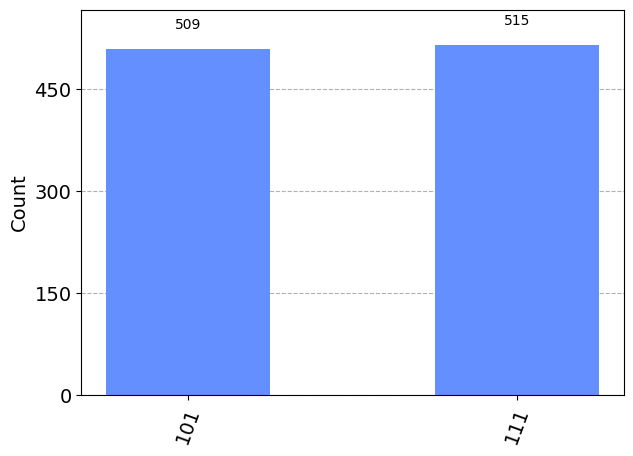

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

def grover_algorithm(n):
    # Crear un circuito cuántico con n qubits y n bits clásicos
    qc = QuantumCircuit(n, n)

    # Aplicar compuertas H a todos los qubits
    qc.h(range(n))

    # Oráculo: aquí podrías implementar la función que marca la solución deseada
    # Por ejemplo, para buscar el estado |11...1⟩, podrías aplicar una compuerta Z a todos los qubits
    qc.cz(0, n-1)

    # Operador de difusión: aquí se reflejan las amplitudes alrededor de la media
    qc.h(range(n))
    qc.x(range(n))
    qc.cz(0, n-1)
    qc.x(range(n))
    qc.h(range(n))

    # Medir los qubits
    qc.measure(range(n), range(n))

    return qc

# Especificar el número de qubits
n_qubits = 3

# Crear el circuito cuántico
grover_circuit = grover_algorithm(n_qubits)

# Simular el circuito en un simulador cuántico
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(grover_circuit, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()

# Visualizar los resultados
counts = result.get_counts()
plot_histogram(counts)
